In [1]:
# Load Libreries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import pyplot
from scipy.stats import norm
import datetime as dt

In [166]:
# Import data
Loans_df = pd.read_csv("Loan_Data.csv")

In [100]:
Loans_df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [101]:
Loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [102]:
Loans_df.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


In [103]:
Loans_df.tail(10)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
9990,4988839,3,5414.335510,13448.430230,81748.34618,6,559,0
9991,2243629,5,5181.244374,23957.565560,82865.37500,2,559,1
9992,2360357,1,2730.172218,4015.958697,50767.13518,6,569,0
9993,4668682,1,4337.978847,7277.852831,74551.25247,6,728,0
9994,4826911,1,2167.752325,4913.969275,51726.62423,6,672,0
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0
9999,5533570,1,1917.652480,3050.248203,30611.62821,6,757,0


In [104]:
Loans_df['default'].value_counts()

default
0    8149
1    1851
Name: count, dtype: int64

# Exploratory Data Analysis


Using quick visualisations, we can explore the relationship between different variables in the dataset.

Let's start with a dual histogram of the FICO score of the borrowers, depending on the deafault (i.e. if a borrower defaults).

Text(0.5, 0, 'FICO')

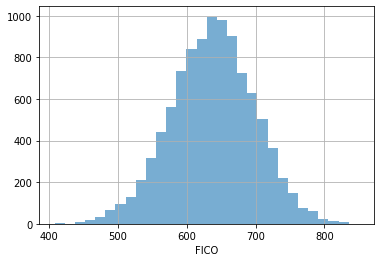

In [7]:
Loans_df['fico_score'].hist(bins=30,alpha=0.6,label='default=1')
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

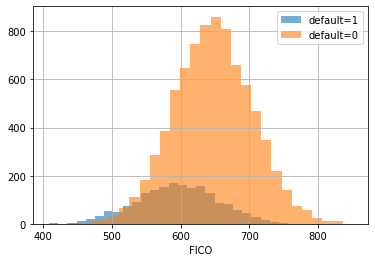

In [8]:
Loans_df[Loans_df['default']==1]['fico_score'].hist(bins=30,alpha=0.6,label='default=1')
Loans_df[Loans_df['default']==0]['fico_score'].hist(bins=30,alpha=0.6,label='default=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'income')

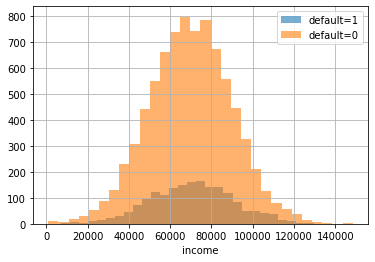

In [9]:
Loans_df[Loans_df['default']==1]['income'].hist(bins=30,alpha=0.6,label='default=1')
Loans_df[Loans_df['default']==0]['income'].hist(bins=30,alpha=0.6,label='default=0')
plt.legend()
plt.xlabel('income')

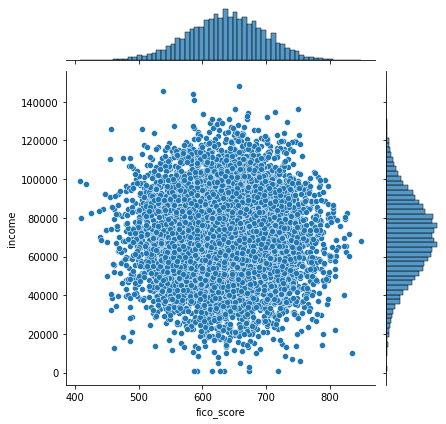

In [10]:
sns.jointplot(x='fico_score',y='income',data=Loans_df)

Text(0.5, 0, 'loan_amt_outstanding')

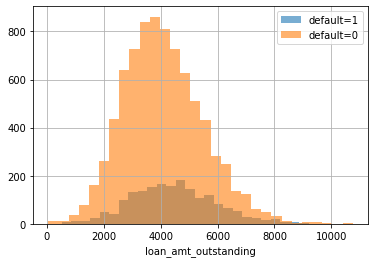

In [11]:
Loans_df[Loans_df['default']==1]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='default=1')
Loans_df[Loans_df['default']==0]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='default=0')
plt.legend()
plt.xlabel('loan_amt_outstanding')

Text(0.5, 0, 'income')

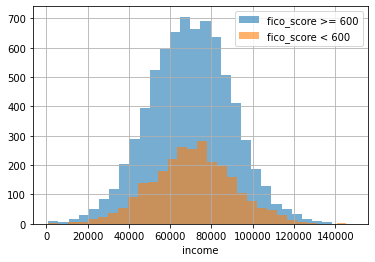

In [12]:
Loans_df[Loans_df['fico_score']>=600]['income'].hist(bins=30,alpha=0.6,label='fico_score >= 600')
Loans_df[Loans_df['fico_score']<600]['income'].hist(bins=30,alpha=0.6,label='fico_score < 600')
plt.legend()
plt.xlabel('income')

Text(0.5, 0, 'loan_amt_outstanding')

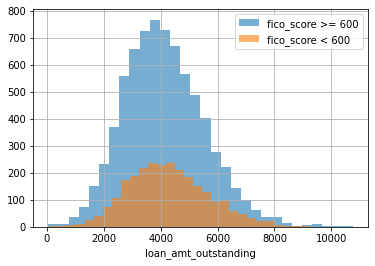

In [13]:
Loans_df[Loans_df['fico_score']>=600]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='fico_score >= 600')
Loans_df[Loans_df['fico_score']<600]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='fico_score < 600')
plt.legend()
plt.xlabel('loan_amt_outstanding')

Text(0.5, 1.0, 'Total Employee Length')

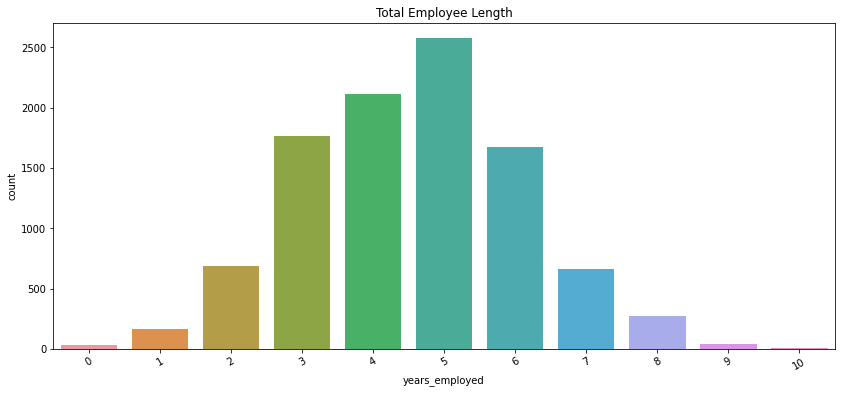

In [14]:
#emp_length variable
df = Loans_df.groupby('years_employed')['years_employed'].count().reset_index(name='count').sort_values('years_employed',ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
q = sns.barplot(x="years_employed", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Total Employee Length')

Text(0.5, 1.0, 'credit lines outstanding ')

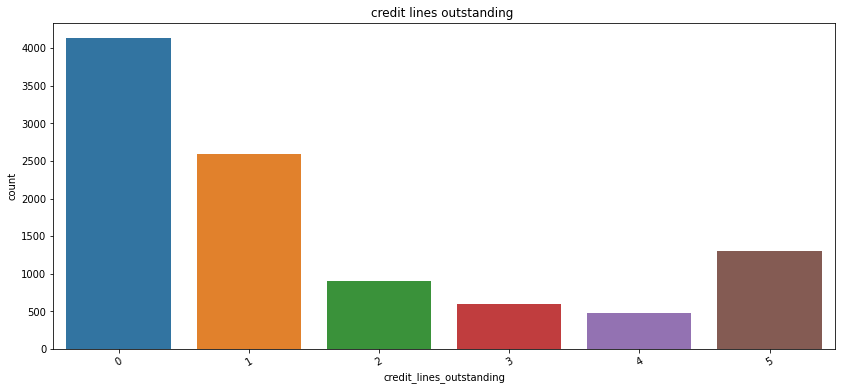

In [15]:
#credit_lines_outstanding variable
df = Loans_df.groupby('credit_lines_outstanding')['credit_lines_outstanding'].count().reset_index(name='count').sort_values('credit_lines_outstanding',ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
q = sns.barplot(x="credit_lines_outstanding", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('credit lines outstanding ')

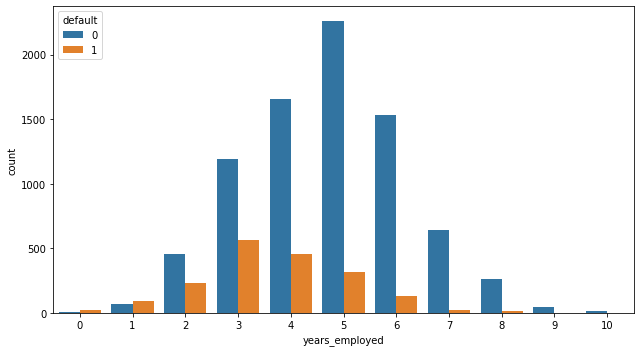

In [16]:
plt.figure(figsize=(9,5))
sns.countplot(x=Loans_df['years_employed'],hue=Loans_df['default'])
plt.tight_layout()

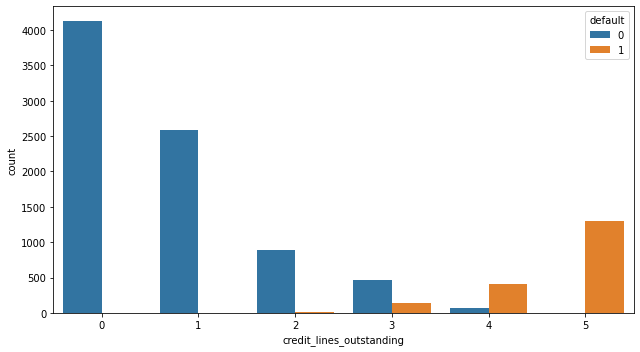

In [17]:
plt.figure(figsize=(9,5))
sns.countplot(x=Loans_df['credit_lines_outstanding'],hue=Loans_df['default'])
plt.tight_layout()

In [18]:
Loans_df.groupby('credit_lines_outstanding')['default'].count().reset_index(name='count').sort_values('credit_lines_outstanding',ascending=True)

,credit_lines_outstanding,count
0,0,4128
1,1,2590
2,2,902
3,3,599
4,4,484
5,5,1297


In [105]:
Loans_df['ratio_income_Totdebt'] = Loans_df['income']/Loans_df['total_debt_outstanding']
Loans_df['ratio_income_loan_amt'] = Loans_df['income']/Loans_df['loan_amt_outstanding']

In [106]:
Loans_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,ratio_income_Totdebt,ratio_income_loan_amt
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,19.931033,14.945650
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,3.238454,13.603576
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,32.481364,19.585647
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,29.722181,15.599407
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,13.256433,17.422978
...,...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,16.717341,14.072707
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,14.651358,19.287238
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,7.935166,12.367199
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,48.825030,15.485222


Text(0.5, 0, 'ratio_income_Totdebt')

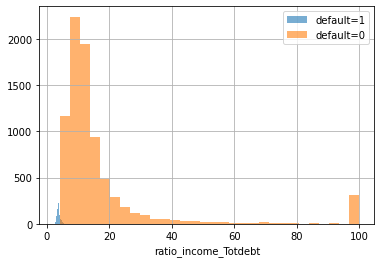

In [21]:
Loans_df[Loans_df['default']==1]['ratio_income_Totdebt'].hist(bins=30,alpha=0.6,label='default=1')
Loans_df[Loans_df['default']==0]['ratio_income_Totdebt'].hist(bins=30,alpha=0.6,label='default=0')
plt.legend()
plt.xlabel('ratio_income_Totdebt')

Text(0.5, 0, 'ratio_income_loan_amt')

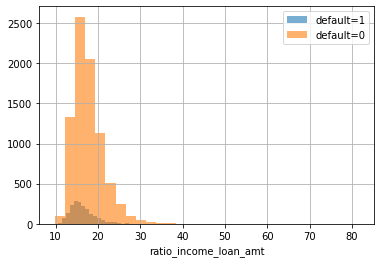

In [22]:
Loans_df[Loans_df['default']==1]['ratio_income_loan_amt'].hist(bins=30,alpha=0.6,label='default=1')
Loans_df[Loans_df['default']==0]['ratio_income_loan_amt'].hist(bins=30,alpha=0.6,label='default=0')
plt.legend()
plt.xlabel('ratio_income_loan_amt')

Text(0.5, 0, 'ratio_income_Totdebt')

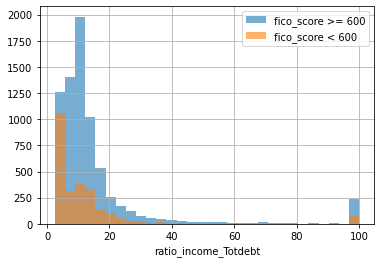

In [23]:
Loans_df[Loans_df['fico_score']>=600]['ratio_income_Totdebt'].hist(bins=30,alpha=0.6,label='fico_score >= 600')
Loans_df[Loans_df['fico_score']<600]['ratio_income_Totdebt'].hist(bins=30,alpha=0.6,label='fico_score < 600')
plt.legend()
plt.xlabel('ratio_income_Totdebt')

Text(0.5, 0, 'ratio_income_loan_amt')

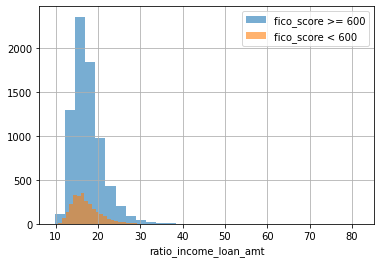

In [24]:
Loans_df[Loans_df['fico_score']>=600]['ratio_income_loan_amt'].hist(bins=30,alpha=0.6,label='fico_score >= 600')
Loans_df[Loans_df['fico_score']<600]['ratio_income_loan_amt'].hist(bins=30,alpha=0.6,label='fico_score < 600')
plt.legend()
plt.xlabel('ratio_income_loan_amt')

Text(0.5, 1.0, 'credit_lines_outstanding to mean total debt')

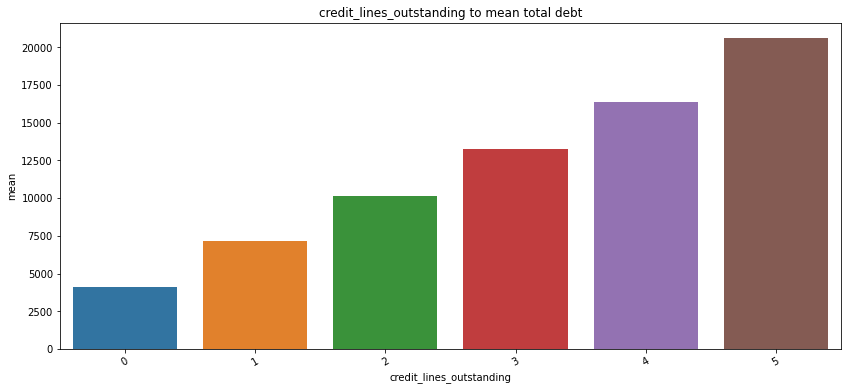

In [25]:
df=Loans_df.groupby(['credit_lines_outstanding'])['total_debt_outstanding'].mean().reset_index(name='mean').sort_values('credit_lines_outstanding',ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
q = sns.barplot(x="credit_lines_outstanding", y="mean", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('credit_lines_outstanding to mean total debt')

Text(0.5, 1.0, 'credit_lines_outstanding to mean ratio income/Total debt')

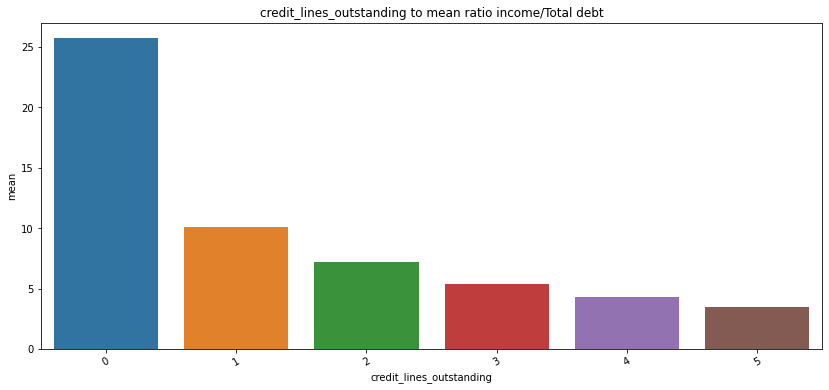

In [26]:
df=Loans_df.groupby(['credit_lines_outstanding'])['ratio_income_Totdebt'].mean().reset_index(name='mean').sort_values('credit_lines_outstanding',ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
q = sns.barplot(x="credit_lines_outstanding", y="mean", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('credit_lines_outstanding to mean ratio income/Total debt')

Text(0.5, 1.0, 'credit_lines_outstanding to mean ratio income/loan amount')

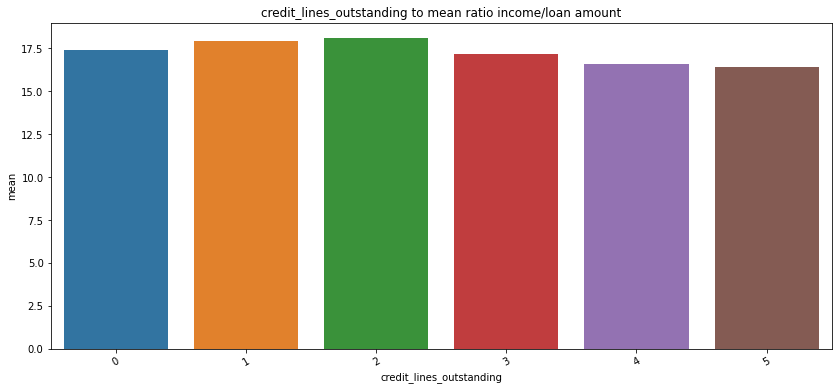

In [27]:
df=Loans_df.groupby(['credit_lines_outstanding'])['ratio_income_loan_amt'].mean().reset_index(name='mean').sort_values('credit_lines_outstanding',ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
q = sns.barplot(x="credit_lines_outstanding", y="mean", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('credit_lines_outstanding to mean ratio income/loan amount')

Text(0.5, 1.0, 'credit_lines_outstanding to mean fico score')

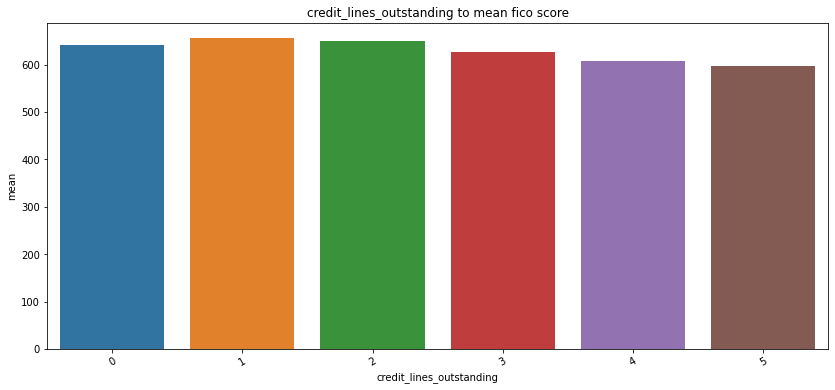

In [28]:
df=Loans_df.groupby(['credit_lines_outstanding'])['fico_score'].mean().reset_index(name='mean').sort_values('credit_lines_outstanding',ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
q = sns.barplot(x="credit_lines_outstanding", y="mean", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('credit_lines_outstanding to mean fico score')

# Correlation in Credit Features

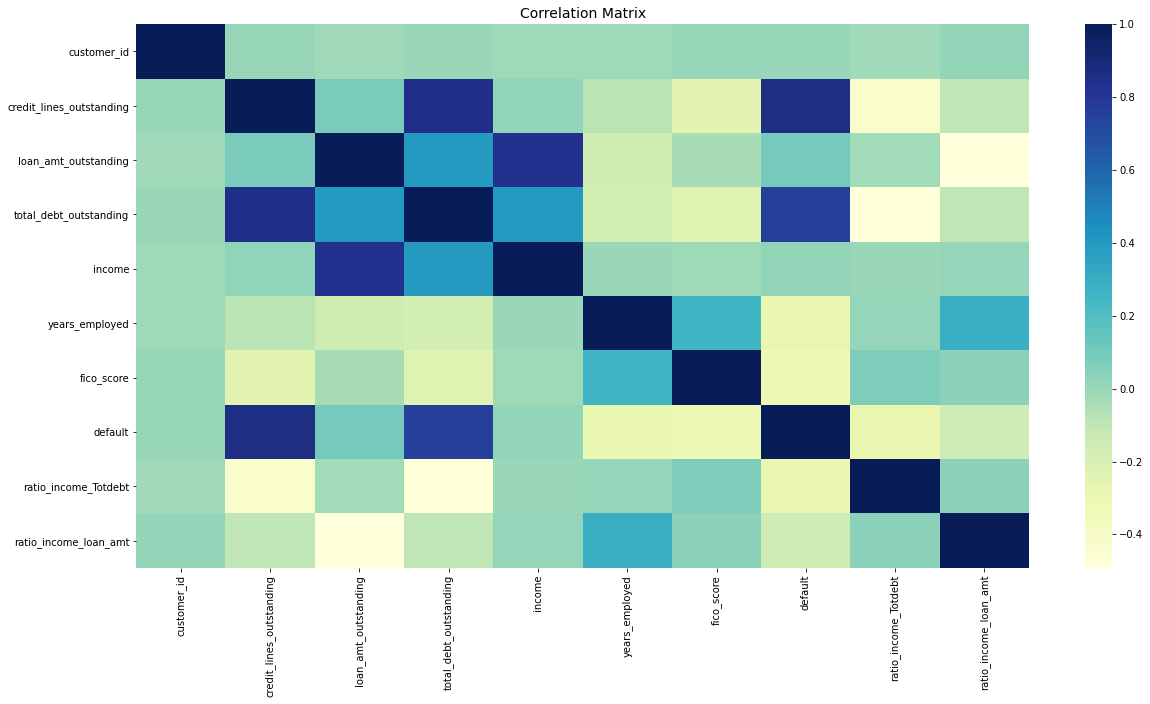

In [29]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))

# Imbalanced DataFrame Correlation
corr = Loans_df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14)
plt.show()

# Create predictions of probability for loan status using test data

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, roc_auc_score


In [31]:
X = Loans_df.drop(['default'], axis=1)

In [32]:
Y = Loans_df['default']

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.6, random_state=123)

In [34]:
# Create, train, and fit a logistic regression model
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(Y_train))

In [35]:
# Create predictions of probability for loan status using test data
# .predict_proba creates an array of probabilities of default: [[non-defualt-0, default-1]]
lr_preds = clf_logistic.predict_proba(X_test)

In [36]:
# # Create dataframes of predictions and true labels
lr_preds_df = pd.DataFrame(lr_preds[:,1][0:], columns = ['lr_pred_PD'])
true_df = Y_test

In [37]:
# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), lr_preds_df], axis = 1))

      default    lr_pred_PD
0           0  1.921681e-01
1           0  3.158252e-03
2           0  8.001060e-06
3           0  5.715621e-04
4           0  1.011647e-02
...       ...           ...
5995        0  5.925136e-07
5996        0  1.458321e-05
5997        0  1.692793e-02
5998        0  6.280797e-07
5999        0  7.617845e-01

[6000 rows x 2 columns]


In [38]:
import math

In [39]:
lr_preds_df.round(decimals=2).value_counts()

lr_pred_PD
0.00          4441
1.00           734
0.01           131
0.99            73
0.02            47
              ... 
0.39             1
0.40             1
0.79             1
0.44             1
0.74             1
Name: count, Length: 99, dtype: int64

In [40]:
Y_test.value_counts()

default
0    4932
1    1068
Name: count, dtype: int64

In [41]:
# Reassign loan status based on the threshold and print the predictions
lr_preds_df['lr_pred_loan_status_60'] = lr_preds_df['lr_pred_PD'].apply(lambda x: 1 if x > 0.60 else 0)
print("Non-Default / Default predictions at 60% Threshhold: ")
print(lr_preds_df['lr_pred_loan_status_60'].value_counts())

Non-Default / Default predictions at 60% Threshhold: 
lr_pred_loan_status_60
0    4966
1    1034
Name: count, dtype: int64


In [42]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix at 60% Threshhold: ")
print(confusion_matrix(Y_test, lr_preds_df['lr_pred_loan_status_60']))

Confusion Matrix at 60% Threshhold: 
[[4898   34]
 [  68 1000]]


In [43]:
# Print the classification report
from sklearn.metrics import classification_report
target_names = ['Non-Default', 'Default']
print(classification_report(Y_test, lr_preds_df['lr_pred_loan_status_60'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.99      0.99      0.99      4932
     Default       0.97      0.94      0.95      1068

    accuracy                           0.98      6000
   macro avg       0.98      0.96      0.97      6000
weighted avg       0.98      0.98      0.98      6000



In [44]:
# Print the accuracy score the model
print(clf_logistic.score(X_test, Y_test))

0.9835


In [45]:
# Plot the ROC curve of the probabilities of default
from sklearn.metrics import roc_curve

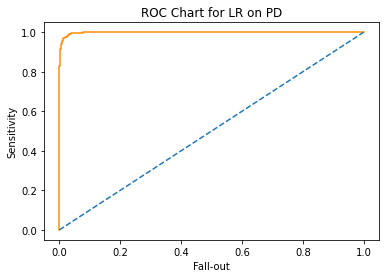

In [46]:
lr_prob_default = lr_preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(Y_test, lr_prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Chart for LR on PD")
plt.xlabel("Fall-out")
plt.ylabel("Sensitivity")
plt.show()

In [48]:
lr_preds_df.round(decimals=2)

,lr_pred_PD,lr_pred_loan_status_60
0,0.19,0
1,0.00,0
2,0.00,0
3,0.00,0
4,0.01,0
...,...,...
5995,0.00,0
5996,0.00,0
5997,0.02,0
5998,0.00,0


In [107]:
Loans_df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,ratio_income_Totdebt,ratio_income_loan_amt
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,19.931033,14.945650
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,3.238454,13.603576
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,32.481364,19.585647
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,29.722181,15.599407
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,13.256433,17.422978


In [108]:
Loans_df.drop(['default'], axis=1,inplace=True)

In [109]:
Loans_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,ratio_income_Totdebt,ratio_income_loan_amt
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,19.931033,14.945650
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,3.238454,13.603576
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,32.481364,19.585647
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,29.722181,15.599407
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,13.256433,17.422978
...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,16.717341,14.072707
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,14.651358,19.287238
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,7.935166,12.367199
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,48.825030,15.485222


In [110]:
Prob_to_default = clf_logistic.predict_proba(Loans_df)

In [111]:
prob_data = pd.DataFrame(Prob_to_default[:,1][0:].round(decimals = 2), columns = ['Probability _to_Default'])

In [112]:
Loans_df=pd.concat([Loans_df, prob_data], axis = 1)

In [113]:
Loans_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,ratio_income_Totdebt,ratio_income_loan_amt,Probability _to_Default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,19.931033,14.945650,0.00
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,3.238454,13.603576,0.99
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,32.481364,19.585647,0.00
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,29.722181,15.599407,0.00
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,13.256433,17.422978,0.00
...,...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,16.717341,14.072707,0.00
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,14.651358,19.287238,0.00
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,7.935166,12.367199,0.01
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,48.825030,15.485222,0.00


Assuming a recovery rate of 10%, this can be used to give the expected loss on a loan.

In [121]:
# Recovery rate
recovery_rate = 0.1  

In [122]:
# Loss Given Default (LGD)
Loans_df['lgd'] = (1 - recovery_rate) * Loans_df['loan_amt_outstanding']

 Expected Loss (EL)

In [125]:
Loans_df['expected_loss'] = Loans_df['Probability _to_Default'] * Loans_df['lgd']


In [127]:
Loans_df.tail()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,ratio_income_Totdebt,ratio_income_loan_amt,Probability _to_Default,lgd,expected_loss
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,16.717341,14.072707,0.00,2730.282393,0.000000
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,14.651358,19.287238,0.00,3731.615374,0.000000
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,7.935166,12.367199,0.01,2779.401354,27.794014
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,48.825030,15.485222,0.00,2960.011499,0.000000
9999,5533570,1,1917.652480,3050.248203,30611.62821,6,757,10.035783,15.963074,0.00,1725.887232,0.000000


In [129]:
Loans_df.sort_values('expected_loss',ascending=False)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,ratio_income_Totdebt,ratio_income_loan_amt,Probability _to_Default,lgd,expected_loss
1997,6597386,5,10210.746690,33515.971170,107870.38960,2,649,3.218477,10.564398,1.0,9189.672021,9189.672021
2138,1998635,5,9563.693515,28825.601850,112120.62640,3,641,3.889620,11.723570,1.0,8607.324164,8607.324164
9203,4836461,5,9105.964213,42558.451490,133913.38230,3,601,3.146576,14.706118,1.0,8195.367792,8195.367792
9944,3983392,4,8989.178801,30103.662560,124197.63370,2,641,4.125665,13.816349,1.0,8090.260921,8090.260921
5460,2527305,5,8841.923630,32644.921580,115203.15190,2,541,3.528976,13.029196,1.0,7957.731267,7957.731267
...,...,...,...,...,...,...,...,...,...,...,...,...
3825,5644865,0,1906.390298,1799.098281,39298.79573,5,640,21.843607,20.614245,0.0,1715.751268,0.000000
3824,5387202,0,5023.085666,8183.306718,97075.43796,3,698,11.862618,19.325858,0.0,4520.777099,0.000000
3822,4852626,0,2347.870065,728.786824,72878.68237,5,636,100.000000,31.040339,0.0,2113.083059,0.000000
3821,1975554,0,5171.867325,4630.787898,85411.55172,4,634,18.444281,16.514645,0.0,4654.680592,0.000000


# Creating, Training, and Fitting a XGBoost Model to Oversampled Data

In [130]:
import xgboost as xgb

In [131]:
# Import data
Loans_df = pd.read_csv("Loan_Data.csv")

In [132]:
X = Loans_df.drop(['default'], axis=1)

In [133]:
Y = Loans_df['default']

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=123)

In [135]:
model = xgb.XGBClassifier()
clf_xgbt = model.fit(X_train, np.ravel(Y_train))


In [144]:
# Create predictions of probability for loan status using test data
# .predict_proba creates an array of probabilities of default: [[non-defualt-0, default-1]]
xgbt_preds = clf_xgbt.predict_proba(X_test)


In [145]:
# Create dataframes of predictions and labels
xgbt_preds_df = pd.DataFrame(xgbt_preds[:,1][0:], columns = ['xgbt_pred_PD'])
true_df = Y_test

In [146]:
# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), xgbt_preds_df], axis = 1))

      default  xgbt_pred_PD
0           0      0.029665
1           0      0.000056
2           0      0.000002
3           0      0.000012
4           0      0.000077
...       ...           ...
2995        0      0.000043
2996        1      0.999410
2997        0      0.000028
2998        0      0.000003
2999        1      0.999972

[3000 rows x 2 columns]


In [148]:
# Reassign loan status based on the threshold and print the predictions
xgbt_preds_df['xgbt_pred_loan_status_60'] = xgbt_preds_df['xgbt_pred_PD'].apply(lambda x: 1 if x > 0.60 else 0)
print("Non-Default / Default  predictions at 60% Threshhold: ")
print(xgbt_preds_df['xgbt_pred_loan_status_60'].value_counts())

# Print the confusion matrix
print("Confusion Matrix at 60% Threshhold: ")
print(confusion_matrix(Y_test, xgbt_preds_df['xgbt_pred_loan_status_60']))

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(Y_test, xgbt_preds_df['xgbt_pred_loan_status_60'], target_names=target_names))

Non-Default / Default  predictions at 60% Threshhold: 
xgbt_pred_loan_status_60
0    2475
1     525
Name: count, dtype: int64
Confusion Matrix at 60% Threshhold: 
[[2466    6]
 [   9  519]]
              precision    recall  f1-score   support

 Non-Default       1.00      1.00      1.00      2472
     Default       0.99      0.98      0.99       528

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



0.995


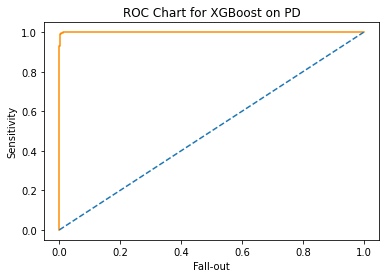

In [149]:
# Print the accuracy score the model
print(clf_xgbt.score(X_test, Y_test))

# Plot the ROC curve of the probabilities of default
from sklearn.metrics import roc_curve

xgb_prob_default = xgbt_preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(Y_test, xgb_prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Chart for XGBoost on PD")
plt.xlabel("Fall-out")
plt.ylabel("Sensitivity")
plt.show()

# Compute the AUC and store it in a variable
from sklearn.metrics import roc_auc_score

xgb_auc = roc_auc_score(Y_test, xgb_prob_default)

In [150]:
xgbt_preds_df

,xgbt_pred_PD,xgbt_pred_loan_status_60
0,0.029665,0
1,0.000056,0
2,0.000002,0
3,0.000012,0
4,0.000077,0
...,...,...
2995,0.000043,0
2996,0.999410,1
2997,0.000028,0
2998,0.000003,0


In [153]:
Loans_df['default'].value_counts()

default
0    8149
1    1851
Name: count, dtype: int64

In [154]:
Loans_df.drop(['default'], axis=1,inplace=True)

In [155]:
Prob_to_default = clf_xgbt.predict_proba(Loans_df)

In [159]:
prob_data = pd.DataFrame(Prob_to_default[:,1][0:].round(decimals = 2), columns = ['Probability _to_Default'])

In [160]:
prob_data['Probability _to_Default'].apply(lambda x: 1 if x > 0.60 else 0).value_counts()

Probability _to_Default
0    8152
1    1848
Name: count, dtype: int64

In [161]:
Loans_df=pd.concat([Loans_df, prob_data], axis = 1)

In [162]:
# Recovery rate
recovery_rate = 0.1  

In [163]:
# Loss Given Default (LGD)
Loans_df['lgd'] = (1 - recovery_rate) * Loans_df['loan_amt_outstanding']

In [164]:
# Expected Loss

Loans_df['expected_loss'] = Loans_df['Probability _to_Default'] * Loans_df['lgd']


In [165]:
Loans_df.sort_values('expected_loss',ascending=False)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,Probability _to_Default,lgd,expected_loss
1997,6597386,5,10210.746690,33515.971170,107870.38960,2,649,1.0,9189.672021,9189.672021
2138,1998635,5,9563.693515,28825.601850,112120.62640,3,641,1.0,8607.324164,8607.324164
9203,4836461,5,9105.964213,42558.451490,133913.38230,3,601,1.0,8195.367792,8195.367792
9944,3983392,4,8989.178801,30103.662560,124197.63370,2,641,1.0,8090.260921,8090.260921
5460,2527305,5,8841.923630,32644.921580,115203.15190,2,541,1.0,7957.731267,7957.731267
...,...,...,...,...,...,...,...,...,...,...
3687,4362545,0,3187.789761,2868.594545,52748.12582,4,669,0.0,2869.010785,0.000000
3686,2432468,0,3570.845462,3645.659263,67239.68452,4,644,0.0,3213.760916,0.000000
3685,1799861,0,2528.033133,2129.209250,43442.20361,5,728,0.0,2275.229820,0.000000
3684,7530508,0,2614.065745,1530.457376,34018.83834,3,542,0.0,2352.659171,0.000000
